# Author: FANDI ZINEB
## CodeAlpha_Project_MachineLearning_Internship_TASK3:
Handwritten Character Recognition
Create a handwritten character recognition system that can recognize various handwritten characters or alphabets.

### Importing Libraries 

In [1]:
import cv2  # OpenCV pour le traitement d'images
import numpy as np 
import pandas as pd 
from keras import optimizers  # Optimiseurs pour Keras (réseau de neurones)
import matplotlib.pyplot as plt  
from sklearn.utils import shuffle 
from keras.models import Sequential  # Modèle de réseau de neurones séquentiel pour Keras
from keras.optimizers import SGD, Adam  # Optimiseurs pour Keras
from tensorflow.keras.optimizers import SGD  # Optimiseurs pour TensorFlow et Keras
from sklearn.model_selection import train_test_split 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping  # Rétroactions pour ajuster le taux d'apprentissage et arrêter l'entraînement prématurément
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout  # Couches pour construire le réseau de neurones

### Reading data

In [2]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\A_Z Handwritten Data.csv',low_memory=False)

In [3]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.tail()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372449,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Shape of the data

In [7]:
df.shape

(372450, 785)

 #### Get data information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


#### Dataset Statistics

In [9]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


#### Check null values

In [10]:
df.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

##  Splitting data

In [11]:
# Prétraitement des données
# Séparer les caractéristiques (X) et les étiquettes (y)
X = df.drop('0', axis=1)
y = df['0']
# Mélanger les données et diviser en ensembles de train et de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print('Train data :', x_train.shape)
print('Test data :', x_test.shape)

Train data : (297960, 784)
Test data : (74490, 784)


## Reshaping the image dataset  

In [12]:
# Remodeler les données pour qu'elles soient compatibles avec l'entrée CNN 
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))
print('Train data :', x_train.shape)
print('Test data :', x_test.shape)

Train data : (297960, 28, 28)
Test data : (74490, 28, 28)


## Generating an alphabet dictionary with corresponding indexes

In [13]:
# Créer un dictionnaire pour les étiquettes
word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}

## Displaying shuffled images

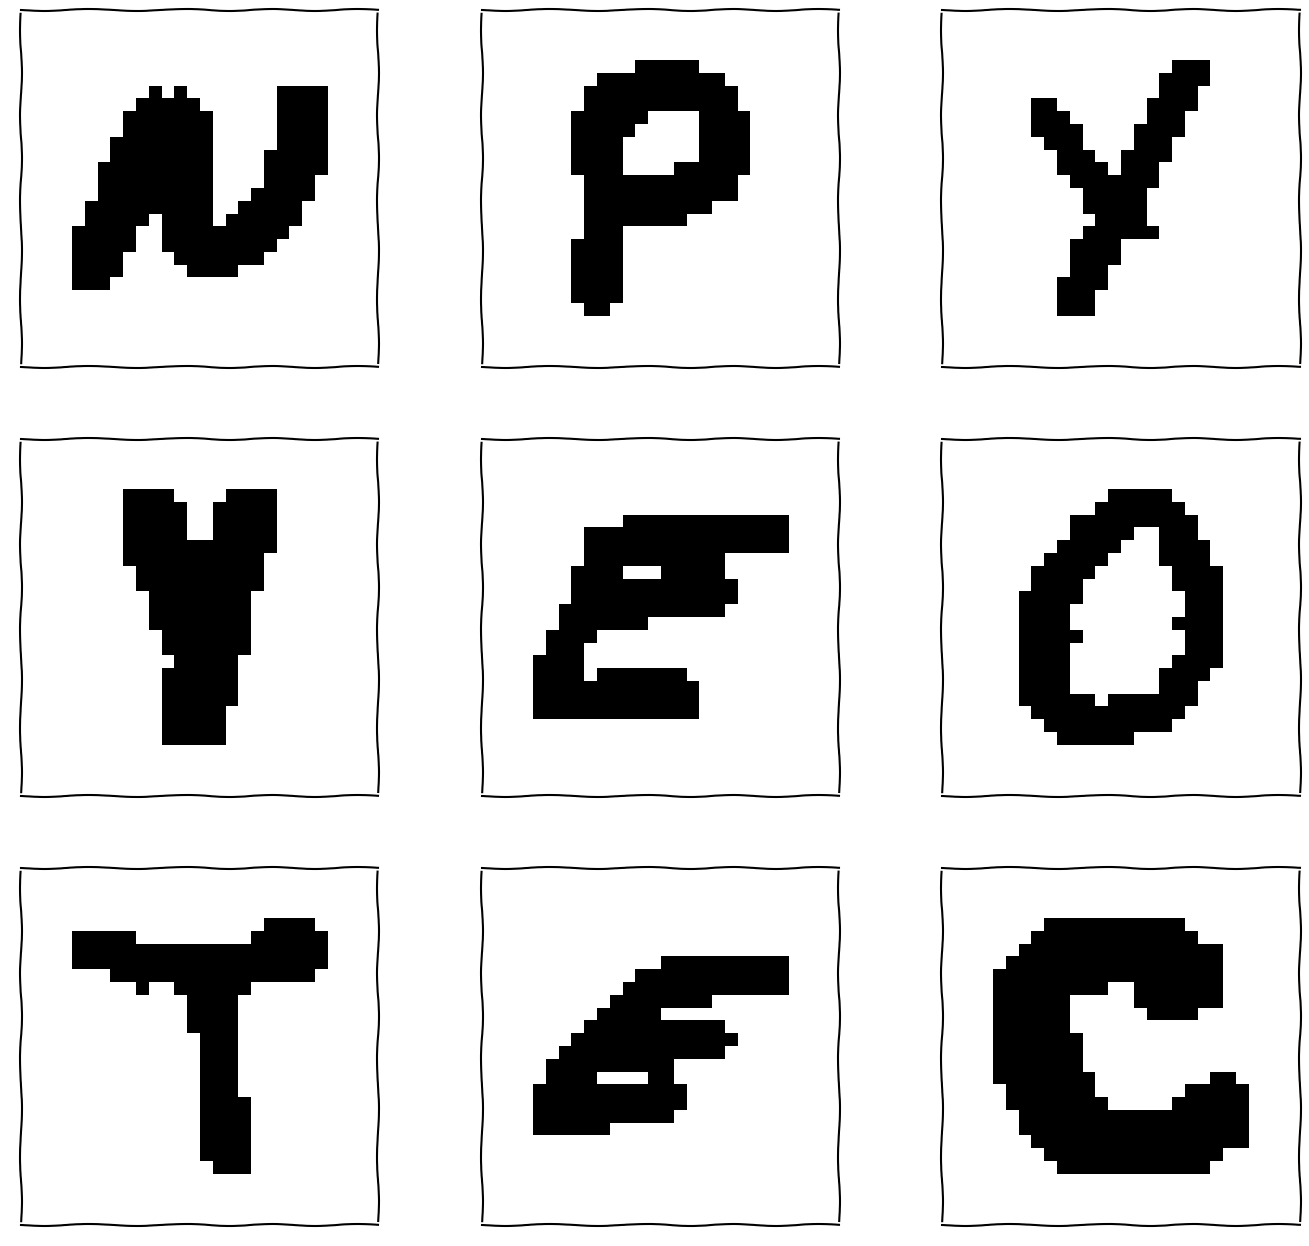

In [15]:
# Mélanger les images
shuff = shuffle(x_train[:100])

# Afficher des exemples d'images mélangées
plt.style.use('fivethirtyeight')
plt.xkcd()
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
axes = ax.flatten()
for i in range(9):
    # Appliquer un seuillage après conversion au format approprié
    shuff_seuil = cv2.threshold(shuff[i].astype(np.uint8), 30, 200, cv2.THRESH_BINARY)[1]
    
    # Afficher l'image seuillée
    axes[i].imshow(shuff_seuil, cmap='Greys')
    
    # Masquer les graduations de l'axe x
    axes[i].set_xticks([])
    
    # Masquer les graduations de l'axe y
    axes[i].set_yticks([])

plt.show()


### Preparing Data for Input to the CNN Model

In [16]:
# Préparer les données pour le modèle CNN
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print('Train data :', x_train.shape)
print('Test data :', x_test.shape)

Train data : (297960, 28, 28, 1)
Test data : (74490, 28, 28, 1)


In [18]:
# Convertir les étiquettes en catégories
from tensorflow.keras.utils import to_categorical

categorical_train = to_categorical(y_train, num_classes=26)
print("shape of train labels:", categorical_train.shape)
categorical_test = to_categorical(y_test, num_classes=26)
print("shape of test labels:", categorical_test.shape)

shape of train labels: (297960, 26)
shape of test labels: (74490, 26)


### Creating the CNN model

In [19]:
# Créer le modèle CNN
model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(26, activation='softmax'))

C:\Users\user\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Compiling Model

In [22]:
# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Entraîner le modèle
history = model.fit(x_train, categorical_train, epochs = 1, validation_data = (x_test, categorical_test))

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 127s 13ms/step - accuracy: 0.7823 - loss: 0.7801 - val_accuracy: 0.9467 - val_loss: 0.1830


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           6,682 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,376 (239.75 KB)

 Trainable params: 20,458 (79.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,918 (159.84 KB)

### Displaying Metrics

In [24]:
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Loss:", history.history['val_loss'])
print("Training Loss:", history.history['loss'])

Validation Accuracy: [0.9467176795005798]
Training Accuracy: [0.8852195143699646]
Validation Loss: [0.1829790472984314]
Training Loss: [0.38900989294052124]


## Predicted Images

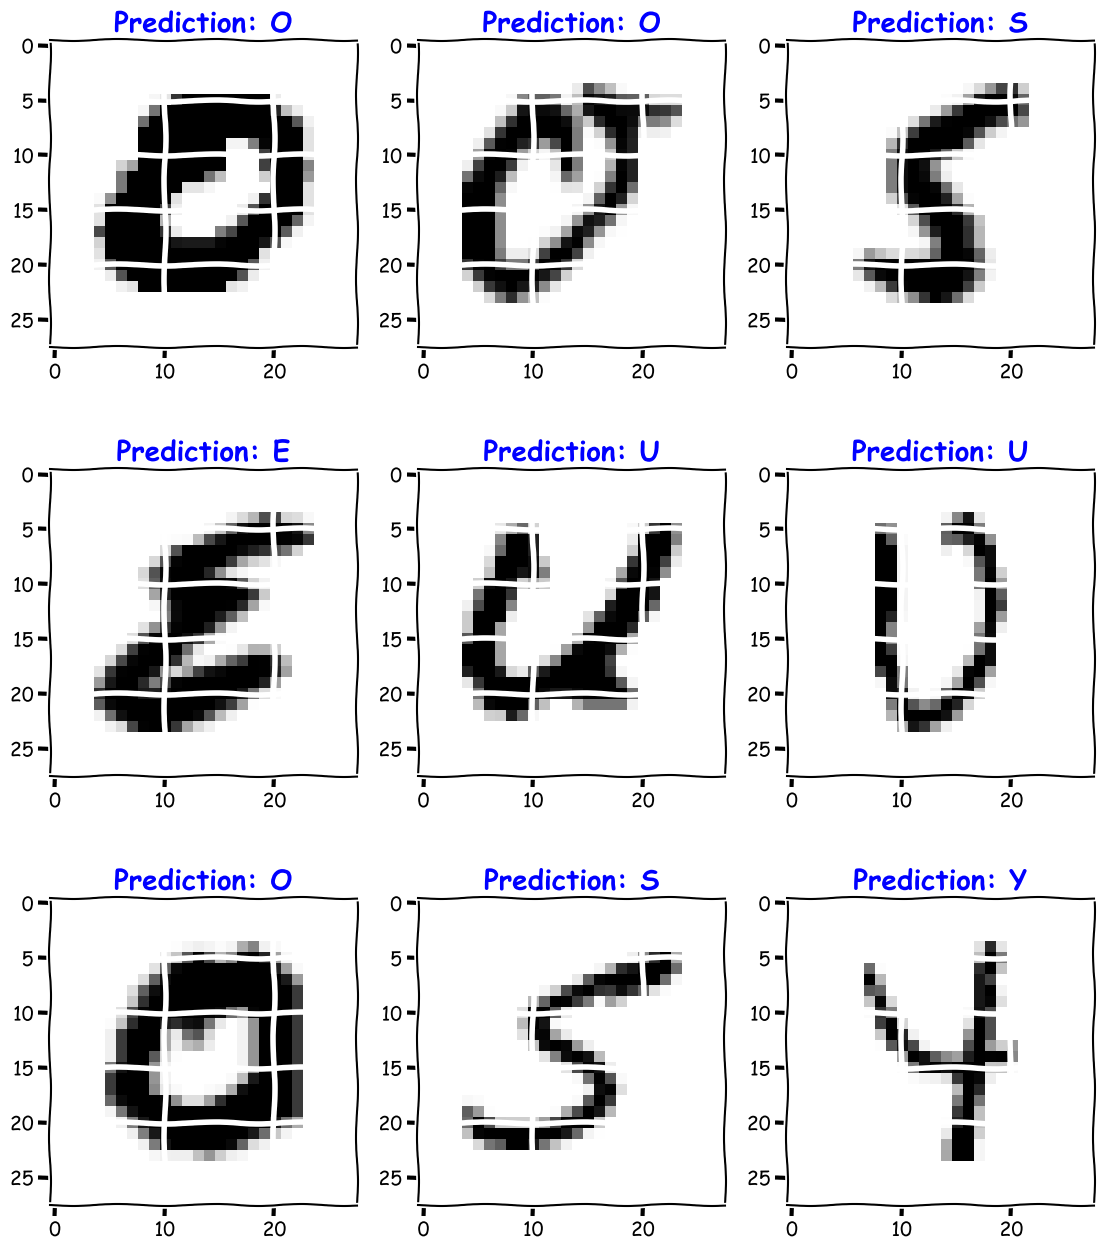

In [25]:
plt.style.use('fivethirtyeight')
plt.xkcd()

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')
    
    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'blue')
    ax.grid()